In [1]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas_profiling

from pandas_profiling import ProfileReport

from scipy.stats import zscore

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from bayes_opt import BayesianOptimization

from imblearn.over_sampling import SMOTE

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.decomposition import PCA

from sklearn.metrics import recall_score, roc_auc_score, log_loss

from yellowbrick.classifier import ClassificationReport, ROCAUC

import random

import statsmodels.api as sm

import statsmodels.formula.api as smf

from sklearn.svm import SVR
from sklearn.metrics import r2_score


/Users/silver-moon/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



In [2]:
# Adjust display and formatting settings

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

from IPython.core.display import display,HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [3]:
df = pd.read_csv('concrete.csv')

In [4]:
df.head(10)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0  141.30 212.00   0.00 203.50          0.00     971.80   748.50   28   
1  168.90  42.20 124.30 158.30         10.80   1,080.80   796.20   14   
2  250.00   0.00  95.70 187.40          5.50     956.90   861.20   28   
3  266.00 114.00   0.00 228.00          0.00     932.00   670.00   28   
4  154.80 183.40   0.00 193.30          9.10   1,047.40   696.70   28   
5  255.00   0.00   0.00 192.00          0.00     889.80   945.00   90   
6  166.80 250.20   0.00 203.50          0.00     975.60   692.60    7   
7  251.40   0.00 118.30 188.50          6.40   1,028.40   757.70   56   
8  296.00   0.00   0.00 192.00          0.00   1,085.00   765.00   28   
9  155.00 184.00 143.00 194.00          9.00     880.00   699.00   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29  
5     21.86  
6     15.75  
7     36.64  
8     21.65  
9     28.99

In [5]:
df.shape

(1030, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
#profile = df.profile_report(style={'full_width':True})
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
#profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile

In [8]:
df.describe().T

count   mean    std    min    25%    50%      75%      max
cement       1,030.00 281.17 104.51 102.00 192.38 272.90   350.00   540.00
slag         1,030.00  73.90  86.28   0.00   0.00  22.00   142.95   359.40
ash          1,030.00  54.19  64.00   0.00   0.00   0.00   118.30   200.10
water        1,030.00 181.57  21.35 121.80 164.90 185.00   192.00   247.00
superplastic 1,030.00   6.20   5.97   0.00   0.00   6.40    10.20    32.20
coarseagg    1,030.00 972.92  77.75 801.00 932.00 968.00 1,029.40 1,145.00
fineagg      1,030.00 773.58  80.18 594.00 730.95 779.50   824.00   992.60
age          1,030.00  45.66  63.17   1.00   7.00  28.00    56.00   365.00
strength     1,030.00  35.82  16.71   2.33  23.71  34.45    46.14    82.60

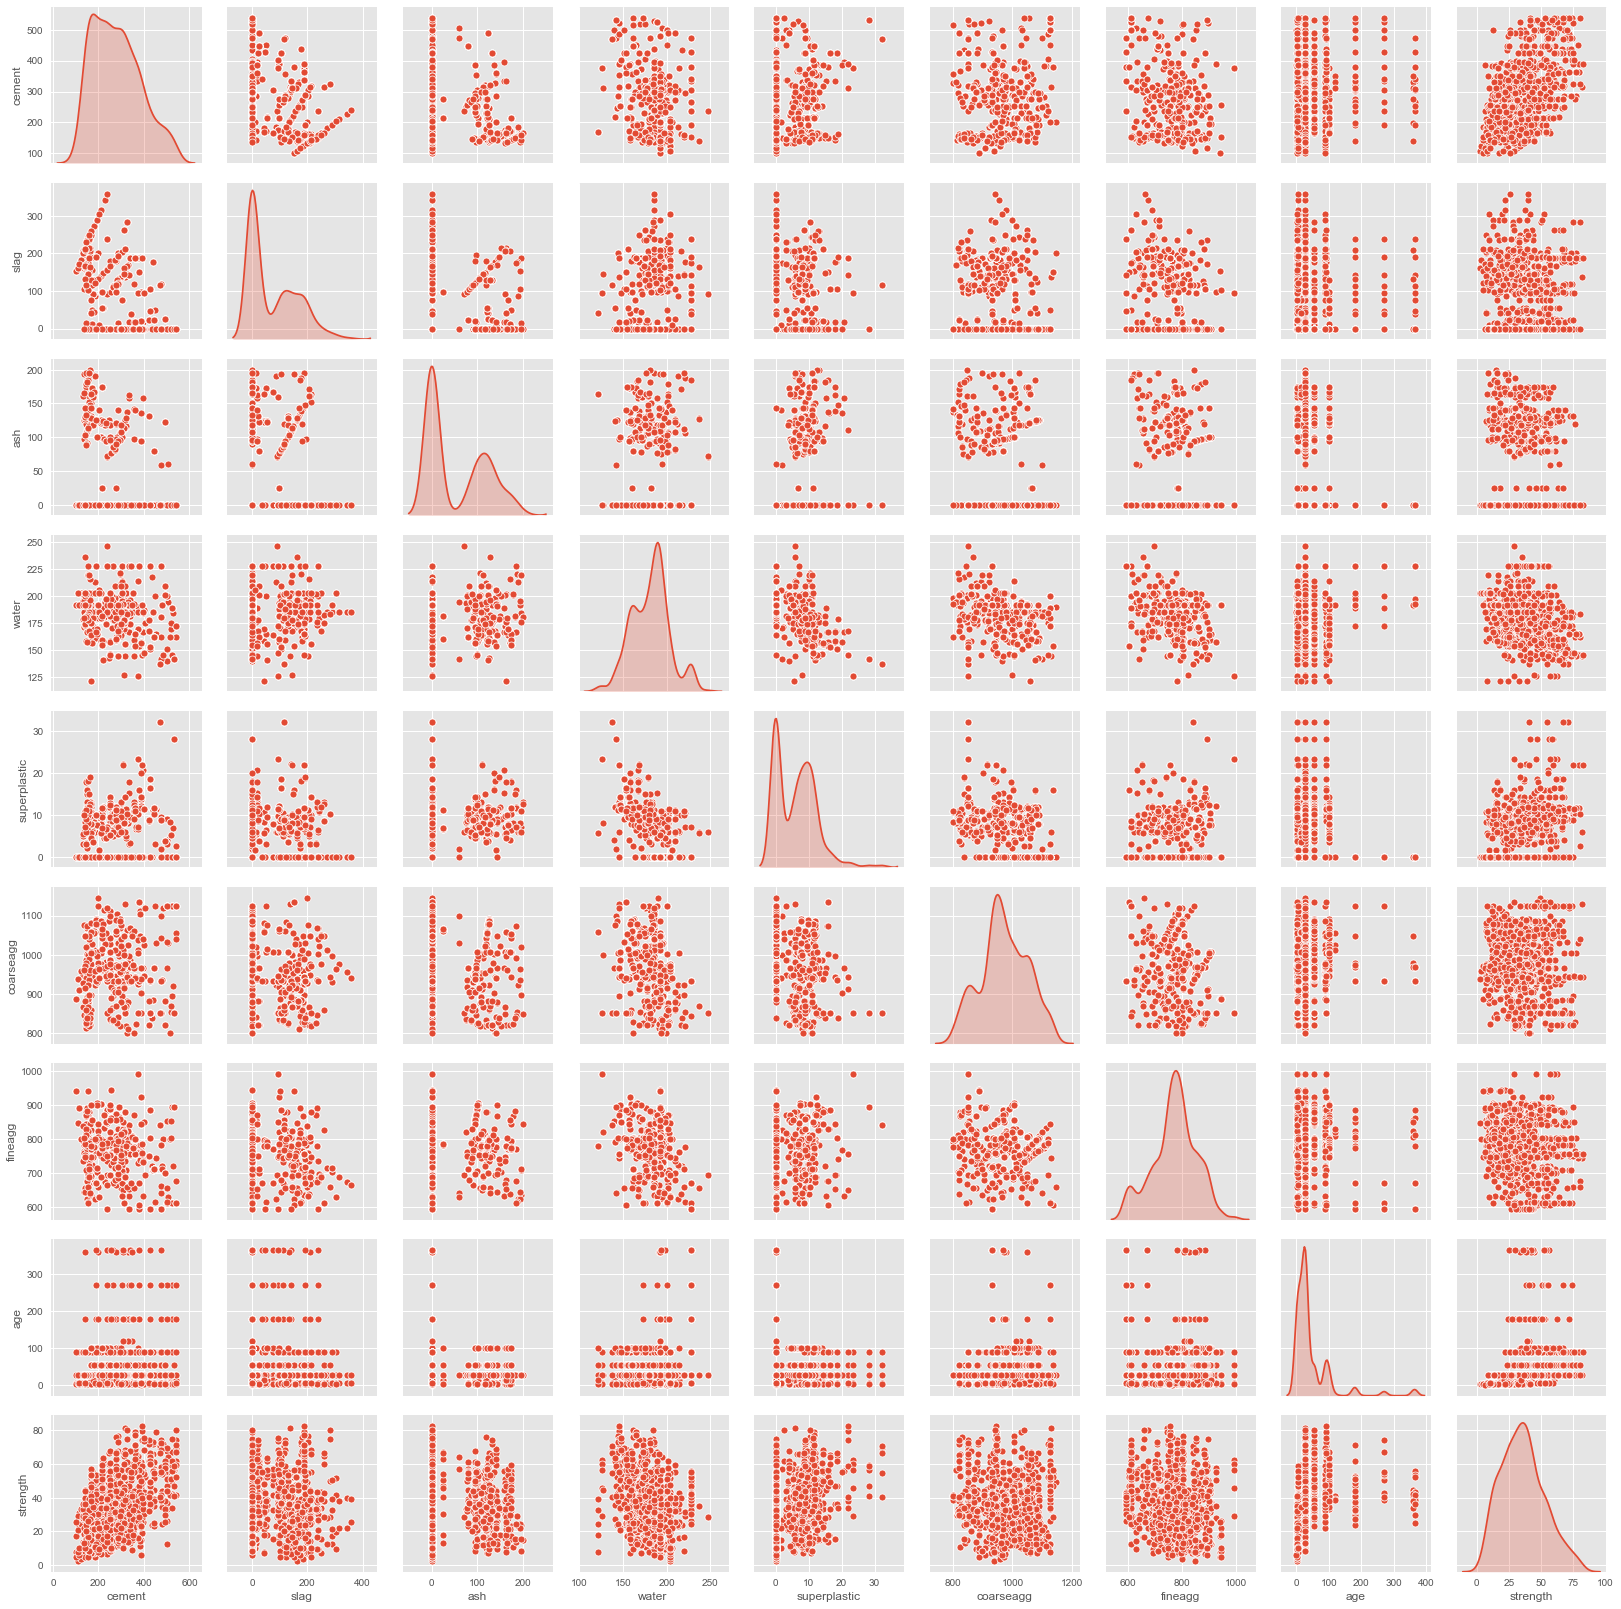

In [9]:
sns.pairplot(df, diag_kind = 'kde')
plt.show()

# Observations from Pairplot
- Slag, Ash, Superplastic and Age data is right skewed

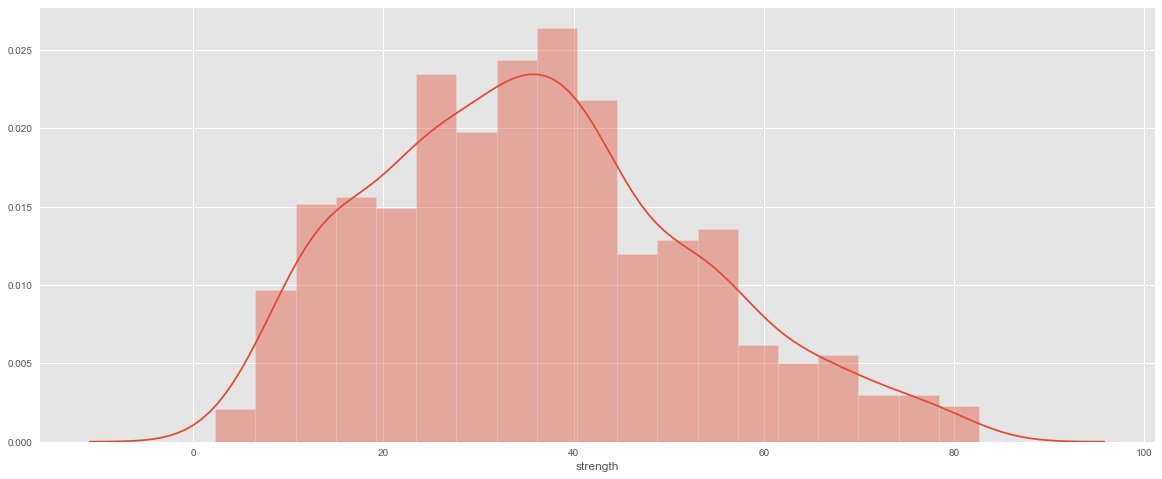

In [10]:
plt.figure(figsize=(20,8))
sns.distplot(df['strength'])
plt.show()

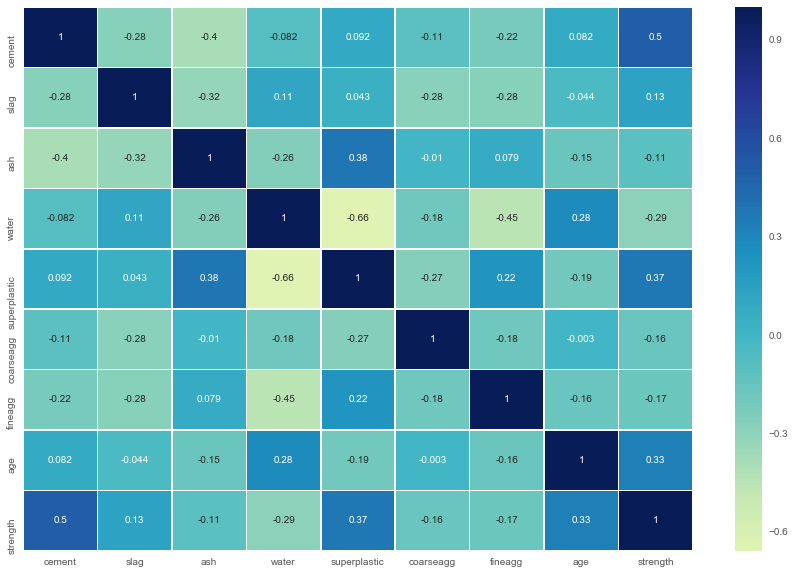

In [11]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(),
           annot=True,
           linewidth=.5,
           center=0,
           cbar=True,
           cmap="YlGnBu")

# HeatMap Observations
From the above heatmap it is cleat that:
- Strength is positively/strongly co-related with Parameters: Cement, Superplastic and Age and also Negatively co-related with Water
- Water and Superplastic are negatively co-related

In [12]:
df['strength'].value_counts()

33.40    6
79.30    4
41.05    4
71.30    4
35.30    4
        ..
61.23    1
26.31    1
38.63    1
47.74    1
15.75    1
Name: strength, Length: 845, dtype: int64

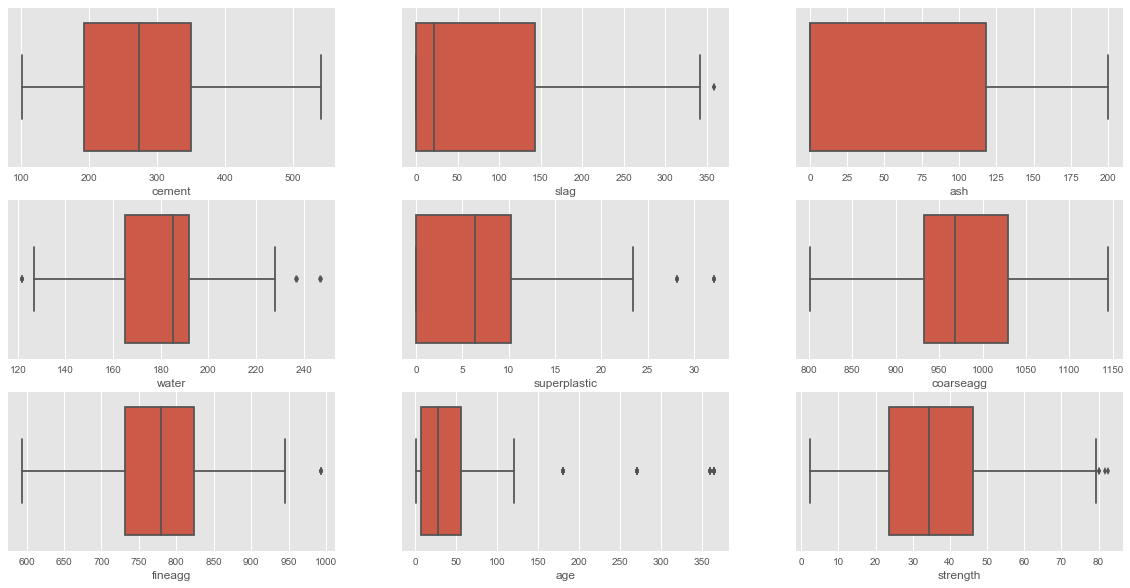

In [13]:
plt.figure(figsize=(20,10))
pos = 1
for i in df.columns:
    plt.subplot(3,3, pos)
    sns.boxplot(df[i])
    pos+=1

In [14]:
X = df.drop(columns = 'strength')
y = df['strength']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

features = X_train.columns

In [15]:
# Linear Regression
lm = LinearRegression().fit(X_train, y_train)

#scores = evaluate_model(lm, features)
print(lm.intercept_)
print(lm.coef_)

-52.96327115891333
[ 0.12655756  0.10882841  0.09070514 -0.10315724  0.37612343  0.02402859
  0.03619289  0.11043497]


In [16]:
y_pred = lm.predict(X_test)

In [17]:
df_lm = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_lm

Actual  Predicted
339    47.78      34.61
244    48.79      36.93
882    33.70      33.21
567    18.28      23.52
923    14.99      21.31
358    24.92      25.80
576    55.90      51.67
27     65.20      65.39
994    16.50      22.51
563    25.57      21.24
228    35.76      30.76
673     7.84      12.17
982    40.93      36.51
924    30.96      17.77
590    45.37      45.34
839    35.10      46.73
35     39.16      31.57
368    19.42      25.40
133    25.08      52.59
340    33.73      32.76
195    22.44      21.05
455    38.00      48.42
727    10.22      15.86
403    45.30      42.41
119    33.36      35.84
979    61.80      58.44
434    39.38      36.72
49     33.40      55.68
922    38.21      30.78
274    33.76      40.35
6      15.75      23.67
486    37.43      29.77
579    30.57      26.16
329    47.81      20.00
80     28.47      27.79
952    42.33      24.82
671    11.65      18.48
636    14.20      19.12
944    17.96      16.26
408    54.60      42.80
104    11.98      24.57
770    33.06      25.36
991    75.50      60.92
950    82.60      70.28
310    42.22      36.00
978    41.94      39.05
802    23.70      26.03
910    13.52      20.43
85     32.24      26.40
347    50.73      41.07
191    61.99      42.50
724    22.49      34.17
795    13.18      25.14
797    14.64      20.93
120    16.26      23.25
189    44.87      28.48
94      4.90      14.99
200    33.95      25.98
650     8.49      23.72
262    51.73      46.05
34     37.91      33.40
41     60.32      40.63
742    18.20      23.63
463    77.30      57.09
928    54.77      55.61
830    49.20      56.12
818    20.87      19.10
439     8.20      15.42
531    19.20      28.33
255    20.77      20.75
78     27.42      36.64
186    32.88      27.76
889    57.92      52.04
984    53.66      41.10
156    56.40      66.17
509     8.37      13.94
99     36.25      43.19
699    68.30      56.60
495    13.54      27.13
844    24.10      46.29
743    15.57      24.85
108    12.18      16.78
17     44.86      28.27
236    18.00      25.20
355    52.50      37.54
101    61.89      52.52
345    46.24      33.14
154    11.47      15.59
65     29.98      28.03
1002   38.70      42.33
833    61.24      44.62
869    41.37      50.08
201    39.46      34.90
311    19.77      18.02
512    38.46      36.90
180    24.48      23.72
768    36.96      27.57
194    23.79      25.64
555    27.94      33.86
354     7.51      21.31
985    32.72      41.72
482    65.20      65.39
207    46.93      34.76
90     14.59      22.82
711    43.80      39.15
675    20.08      22.18
241    41.54      36.62
698    11.48      15.71
943    35.30      51.23
806    33.02      28.09
809     7.72      11.47
395    56.62      41.88
543    46.20      51.62
915    23.22      28.17
852    22.63      24.84
968    13.57      25.00
734    52.20      34.42
59     42.35      35.30
13     26.26      24.09
487    39.84      33.08
175    17.58      16.56
135    56.34      55.21
730    50.08      42.25
949    41.67      48.78
541    29.16      26.93
878    38.41      53.13
383    65.91      46.93
918    39.44      47.08
165    17.24      30.40
645    18.75      18.18
899    46.64      37.39
546    37.43      31.55
891    66.60      57.70
710    39.06      31.18
202    25.45      30.48
3      45.85      19.32
1009   45.71      27.96
804    32.11      48.31
867    53.96      37.51
718    21.16      24.60
796    19.01      23.62
986    21.97      20.69
866    37.17      31.60
480    40.06      29.68
148    46.68      51.10
386    47.13      31.00
2      29.22      27.35
599    13.20      19.01
72     28.10      49.36
366    42.70      31.72
142    37.72      34.94
238    24.58      31.45
181    59.49      50.26
331    33.42      31.66
733    79.30      60.95
422    13.82      24.59
973    25.61      49.79
73     26.92      25.07
117    39.40      30.62
404    15.52      24.49
663    36.84      49.80
111    12.05      14.19
5      21.86      25.02
419    54.28      46.50
494    30.45      36.78
298    33.40      55.6

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 8.199198850420991
Mean Squared Error: 106.54560359850507
Root Mean Squared Error: 10.322092985364211
R Squared: 0.6339136715208276


In [19]:
X_stats = sm.add_constant(X_train)
ols = sm.OLS(y_train,X_stats).fit()

In [20]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     135.3
Date:                Fri, 13 Mar 2020   Prob (F-statistic):          2.18e-137
Time:                        19:36:59   Log-Likelihood:                -2712.8
No. Observations:                 721   AIC:                             5444.
Df Residuals:                     712   BIC:                             5485.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -52.9633     31.085     -1.704   

# Note
- Logistic Regression Linear model cannot be used as the target value is continous float values

In [21]:
regressor = SVR(kernel='linear').fit(X_train, y_train)

y_pred = regressor.predict(X_test) 

#print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#print('R Squared:', r2_score(y_test, y_pred))

Mean_Absolute_Error = metrics.mean_absolute_error(y_test, y_pred)  
Mean_Squared_Error = metrics.mean_squared_error(y_test, y_pred) 
Root_Mean_Squared_Error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R_Squared = r2_score(y_test, y_pred)

resultsDf = pd.DataFrame({'Method': ['SVR_Linear'],
                         'Mean Absolute Error': Mean_Absolute_Error,
                         'Mean Squared Error': Mean_Squared_Error,
                         'Root Mean_Squared Error': Root_Mean_Squared_Error,
                         'R Squared' : R_Squared})
resultsDf

Method  Mean Absolute Error  Mean Squared Error  \
0  SVR_Linear                 8.06              111.98   

   Root Mean_Squared Error  R Squared  
0                    10.58       0.62

In [22]:
regressor = SVR(kernel='rbf').fit(X_train, y_train)

y_pred = regressor.predict(X_test) 

Mean_Absolute_Error = metrics.mean_absolute_error(y_test, y_pred)  
Mean_Squared_Error = metrics.mean_squared_error(y_test, y_pred) 
Root_Mean_Squared_Error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R_Squared = r2_score(y_test, y_pred)

resultsDf.loc[1] = ['SVR_rbf', Mean_Absolute_Error, Mean_Squared_Error, Root_Mean_Squared_Error, R_Squared]
resultsDf

Method  Mean Absolute Error  Mean Squared Error  \
0  SVR_Linear                 8.06              111.98   
1     SVR_rbf                12.48              227.89   

   Root Mean_Squared Error  R Squared  
0                    10.58       0.62  
1                    15.10       0.22

In [23]:
regressor = SVR(kernel='poly').fit(X_train, y_train)

y_pred = regressor.predict(X_test) 

Mean_Absolute_Error = metrics.mean_absolute_error(y_test, y_pred)  
Mean_Squared_Error = metrics.mean_squared_error(y_test, y_pred) 
Root_Mean_Squared_Error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R_Squared = r2_score(y_test, y_pred)

resultsDf.loc[2] = ['SVR_poly', Mean_Absolute_Error, Mean_Squared_Error, Root_Mean_Squared_Error, R_Squared]
resultsDf

Method  Mean Absolute Error  Mean Squared Error  \
0  SVR_Linear                 8.06              111.98   
1     SVR_rbf                12.48              227.89   
2    SVR_poly                10.40              158.53   

   Root Mean_Squared Error  R Squared  
0                    10.58       0.62  
1                    15.10       0.22  
2                    12.59       0.46

In [24]:
regressor = SVR(kernel='sigmoid').fit(X_train, y_train)

y_pred = regressor.predict(X_test) 

Mean_Absolute_Error = metrics.mean_absolute_error(y_test, y_pred)  
Mean_Squared_Error = metrics.mean_squared_error(y_test, y_pred) 
Root_Mean_Squared_Error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R_Squared = r2_score(y_test, y_pred)

resultsDf.loc[3] = ['SVR_sigmoid', Mean_Absolute_Error, Mean_Squared_Error, Root_Mean_Squared_Error, R_Squared]
resultsDf

Method  Mean Absolute Error  Mean Squared Error  \
0   SVR_Linear                 8.06              111.98   
1      SVR_rbf                12.48              227.89   
2     SVR_poly                10.40              158.53   
3  SVR_sigmoid                13.92              285.02   

   Root Mean_Squared Error  R Squared  
0                    10.58       0.62  
1                    15.10       0.22  
2                    12.59       0.46  
3                    16.88       0.02

# Observations from above Dataframe
- The Linear model fits much better compared to other models as seen from the values of R^2

In [25]:
X_train.corr()

cement  slag   ash  water  superplastic  coarseagg  fineagg  \
cement          1.00 -0.26 -0.43  -0.03          0.08      -0.10    -0.26   
slag           -0.26  1.00 -0.34   0.07          0.05      -0.29    -0.25   
ash            -0.43 -0.34  1.00  -0.24          0.35       0.01     0.10   
water          -0.03  0.07 -0.24   1.00         -0.64      -0.20    -0.45   
superplastic    0.08  0.05  0.35  -0.64          1.00      -0.25     0.22   
coarseagg      -0.10 -0.29  0.01  -0.20         -0.25       1.00    -0.17   
fineagg        -0.26 -0.25  0.10  -0.45          0.22      -0.17     1.00   
age             0.11 -0.08 -0.18   0.28         -0.20      -0.01    -0.13   

               age  
cement        0.11  
slag         -0.08  
ash          -0.18  
water         0.28  
superplastic -0.20  
coarseagg    -0.01  
fineagg      -0.13  
age           1.00

In [26]:
X_train_z = X_train.apply(zscore)
X_test_z = X_test.apply(zscore)

In [27]:
pca = PCA(n_components = 8)
pca.fit(X_train_z)

np.cumsum(pca.explained_variance_ratio_)

array([0.28410439, 0.4631884 , 0.63011879, 0.76026566, 0.87578306,
       0.9725155 , 0.9961181 , 1.        ])

In [28]:
pca = PCA(n_components=8).fit(X_train_z)
X_train = pd.DataFrame(data = pca.transform(X_train_z), columns = ['PC %s' %i for i in range(1,9)])
X_test = pd.DataFrame(data = pca.transform(X_test_z), columns = ['PC %s' %i for i in range(1,9)])

In [29]:
X_train.head()

PC 1  PC 2  PC 3  PC 4  PC 5  PC 6  PC 7  PC 8
0  1.26 -0.61  0.44  0.15 -0.53 -1.36 -0.23 -0.09
1  0.38  1.60  1.10 -0.21 -0.13  0.96  0.25  0.20
2  0.37 -0.55  0.03  0.43 -1.43 -1.30 -0.15 -0.21
3  2.96  0.51  0.05 -0.62  1.24 -1.48 -0.30 -0.18
4 -0.79  0.80  0.54  1.79  1.64 -1.30  0.17 -0.03

In [30]:
X_train.corr()

PC 1  PC 2  PC 3  PC 4  PC 5  PC 6  PC 7  PC 8
PC 1  1.00 -0.00  0.00  0.00  0.00 -0.00  0.00 -0.00
PC 2 -0.00  1.00 -0.00 -0.00  0.00 -0.00  0.00 -0.00
PC 3  0.00 -0.00  1.00  0.00 -0.00 -0.00 -0.00  0.00
PC 4  0.00 -0.00  0.00  1.00  0.00 -0.00 -0.00  0.00
PC 5  0.00  0.00 -0.00  0.00  1.00  0.00  0.00  0.00
PC 6 -0.00 -0.00 -0.00 -0.00  0.00  1.00  0.00 -0.00
PC 7  0.00  0.00 -0.00 -0.00  0.00  0.00  1.00  0.00
PC 8 -0.00 -0.00  0.00  0.00  0.00 -0.00  0.00  1.00

In [31]:
pca_features = X_train.columns

pca_best = [col for col in X_train.columns if col not in ['PC 6', 'PC 7', 'PC 8']]

In [32]:
pca_best

['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5']

In [33]:
regressor = SVR(kernel='linear').fit(X_train[pca_features], y_train)

y_pred = regressor.predict(X_test) 

Mean_Absolute_Error = metrics.mean_absolute_error(y_test, y_pred)  
Mean_Squared_Error = metrics.mean_squared_error(y_test, y_pred) 
Root_Mean_Squared_Error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R_Squared = r2_score(y_test, y_pred)

resultsDf.loc[4] = ['SVR_linear_PCA_ALL', Mean_Absolute_Error, Mean_Squared_Error, Root_Mean_Squared_Error, R_Squared]
resultsDf

Method  Mean Absolute Error  Mean Squared Error  \
0          SVR_Linear                 8.06              111.98   
1             SVR_rbf                12.48              227.89   
2            SVR_poly                10.40              158.53   
3         SVR_sigmoid                13.92              285.02   
4  SVR_linear_PCA_ALL                 8.10              109.92   

   Root Mean_Squared Error  R Squared  
0                    10.58       0.62  
1                    15.10       0.22  
2                    12.59       0.46  
3                    16.88       0.02  
4                    10.48       0.62

In [34]:
regressor = SVR(kernel='linear').fit(X_train[pca_best], y_train)

y_pred = regressor.predict(X_test[pca_best]) 

Mean_Absolute_Error = metrics.mean_absolute_error(y_test, y_pred)  
Mean_Squared_Error = metrics.mean_squared_error(y_test, y_pred) 
Root_Mean_Squared_Error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R_Squared = r2_score(y_test, y_pred)

resultsDf.loc[5] = ['SVR_linear_PCA_best', Mean_Absolute_Error, Mean_Squared_Error, Root_Mean_Squared_Error, R_Squared]
resultsDf

Method  Mean Absolute Error  Mean Squared Error  \
0           SVR_Linear                 8.06              111.98   
1              SVR_rbf                12.48              227.89   
2             SVR_poly                10.40              158.53   
3          SVR_sigmoid                13.92              285.02   
4   SVR_linear_PCA_ALL                 8.10              109.92   
5  SVR_linear_PCA_best                11.09              187.32   

   Root Mean_Squared Error  R Squared  
0                    10.58       0.62  
1                    15.10       0.22  
2                    12.59       0.46  
3                    16.88       0.02  
4                    10.48       0.62  
5                    13.69       0.36